<a href="https://colab.research.google.com/github/MateusSilva12/Locadora.1/blob/master/modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

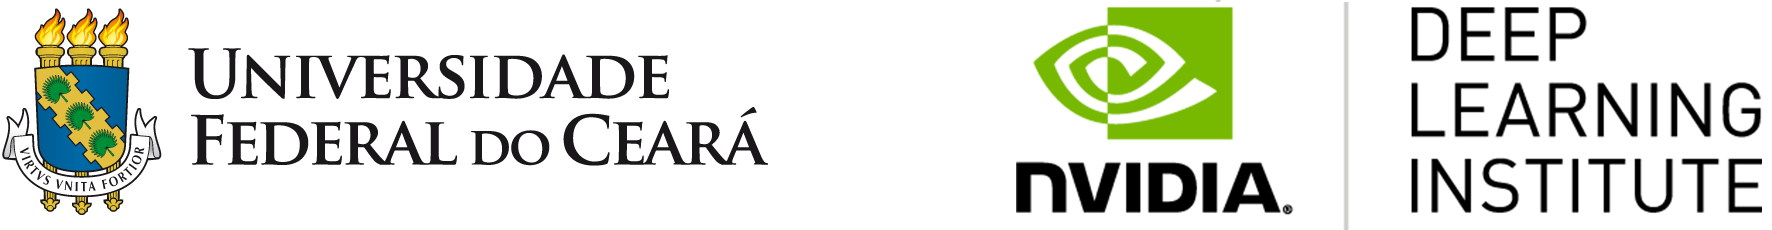

<div align="center">

##### **.**
# **Relatório P2: Identificação de Tipos de Flores**
### **Disciplina**: Aprendizado Profundo
### **Docente:** Júlio Anjos
### **Equipe**: Larissa Sousa, Mateus Silva, Pedro Sampaio e Ruan Rodrigues.

</div>



---

## **1. Introdução**

Neste projeto, o objetivo é desenvolver um modelo de aprendizado profundo para identificar os tipos de flores da cidade de Itapajé, utilizando técnicas de `Transfer Learning`. Para isso, será necessário coletar e curar um dataset local, aplicando técnicas de pré-processamento de dados e balanceamento, além de avaliar otimizadores e monitorar o desempenho do modelo em termos de acurácia e loss.

## **2. Objetivo**

O objetivo principal do projeto é criar um modelo que consiga classificar corretamente as flores encontradas em Itapajé, utilizando um modelo pré-treinado como base, e realizar ajustes com base nos dados coletados localmente. Isso permitirá uma aplicação prática das técnicas de aprendizado profundo estudadas em aula.

## **3. Metodologia**

### **3.1 Coleta de Dados**
- Foram tiradas fotos das flores da cidade de Itapajé utilizando celulares;
- As flores foram rotuladas manualmente com base nas espécies identificadas;
- O dataset foi compartilhado com a outra equipe para uso coletivo.

<div align="center">
    <figure>
        <a href="https://ibb.co/MN4GjfW">
            <img src="https://i.ibb.co/HgsxMC1/flores-p2-aprend-prof.png" alt="flores-p2-aprend-prof" style="width:50%">
        </a>
        <figcaption><b>Figura 1:</b> Amostra de flores capturadas em Itapajé-CE </figcaption>
    </figure>
</div>

### **3.2 Curagem e Pré-processamento de Dados**
- Técnicas de balanceamento de classes foram aplicadas para evitar o viés no treinamento do modelo.
- Foram removidos ruídos nas imagens, e as dimensões foram ajustadas de maneira padronizada (resize) para garantir consistência no modelo.
- Utilizou-se Data Augmentation para aumentar a diversidade do dataset, aplicando rotações, espelhamento e ajustes de brilho e contraste.

### **3.3 Transfer Learning**
- Foi utilizado o modelo pré-treinado VGG16, uma arquitetura de rede neural convolucional amplamente utilizada para classificação de imagens.
- A estratégia de Transfer Learning permitiu utilizar as características extraídas das camadas convolucionais treinadas em grandes datasets de imagens (como o ImageNet) e adaptá-las para o nosso dataset local de flores.

### **3.4 Otimização**
- Foram testados diferentes otimizadores, como Adam e SGD, variando a learning rate para encontrar o melhor desempenho em termos de acurácia e tempo de treinamento.
- Após o treinamento inicial, realizamos fine-tuning nas últimas camadas da rede com uma learning rate menor para refinar o modelo.

### **3.5 Avaliação do Modelo**
- As métricas de acurácia e loss foram monitoradas durante o treinamento para identificar possíveis sinais de overfitting e ajustes necessários.
- O desempenho foi avaliado em um conjunto de validação, e gráficos comparando a acurácia e a loss ao longo das épocas de treinamento foram gerados para auxiliar na análise final.

## **4. Resultados**

### **4.1 Curvas de Acurácia e Loss**
As curvas de acurácia e loss apresentaram uma melhora constante nas primeiras épocas, estabilizando nas épocas finais. Observamos que, após o uso do Data Augmentation e fine-tuning, a generalização do modelo foi significativamente aprimorada.


### **4.2 Comparação de Otimizadores**
O otimizador Adam com learning rate reduzida se destacou no treinamento, apresentando uma melhor convergência e acurácia em comparação com o SGD. O modelo final, utilizando o Adam com fine-tuning, alcançou uma acurácia de validação de 98,88%.

## **5. Conclusão**

O modelo desenvolvido demonstrou ser altamente eficaz na classificação das espécies de flores de Itapajé, aproveitando técnicas de Transfer Learning para reduzir o tempo de treinamento e aumentar a precisão. A utilização de Data Augmentation e ajuste fino das camadas finais do modelo contribuiu para o aumento da capacidade de generalização. Para trabalhos futuros, sugerimos a coleta de um dataset maior e a experimentação com outras arquiteturas de rede neural, como ResNet.

## **Código completo abaixo**

#### Conectar ao Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Bibliotecas**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

#### **Caminhos das imagens**

In [ ]:
# Caminho para os diretórios de treino e validação

train_dir = '/content/drive/MyDrive/Deep_Learning_Flowers/flores_train'
val_dir = '/content/drive/MyDrive/Deep_Learning_Flowers/flores_validation'

#### **Teste entre otimizadores e learning rates**

Found 321 images belonging to 15 classes.
Found 48 images belonging to 15 classes.
Treinando com Adam e learning rate 0.001
Final Acurácia com Adam e learning rate 0.001: 66.67%

Treinando com Adam e learning rate 0.0001
Final Acurácia com Adam e learning rate 0.0001: 81.25%

Treinando com Adam e learning rate 1e-05
Final Acurácia com Adam e learning rate 1e-05: 52.08%

Treinando com SGD e learning rate 0.001
Final Acurácia com SGD e learning rate 0.001: 31.25%

Treinando com SGD e learning rate 0.0001
Final Acurácia com SGD e learning rate 0.0001: 25.00%

Treinando com SGD e learning rate 1e-05
Final Acurácia com SGD e learning rate 1e-05: 16.67%

Treinando com RMSprop e learning rate 0.001
Final Acurácia com RMSprop e learning rate 0.001: 79.17%

Treinando com RMSprop e learning rate 0.0001
Final Acurácia com RMSprop e learning rate 0.0001: 87.50%

Treinando com RMSprop e learning rate 1e-05
Final Acurácia com RMSprop e learning rate 1e-05: 60.42%



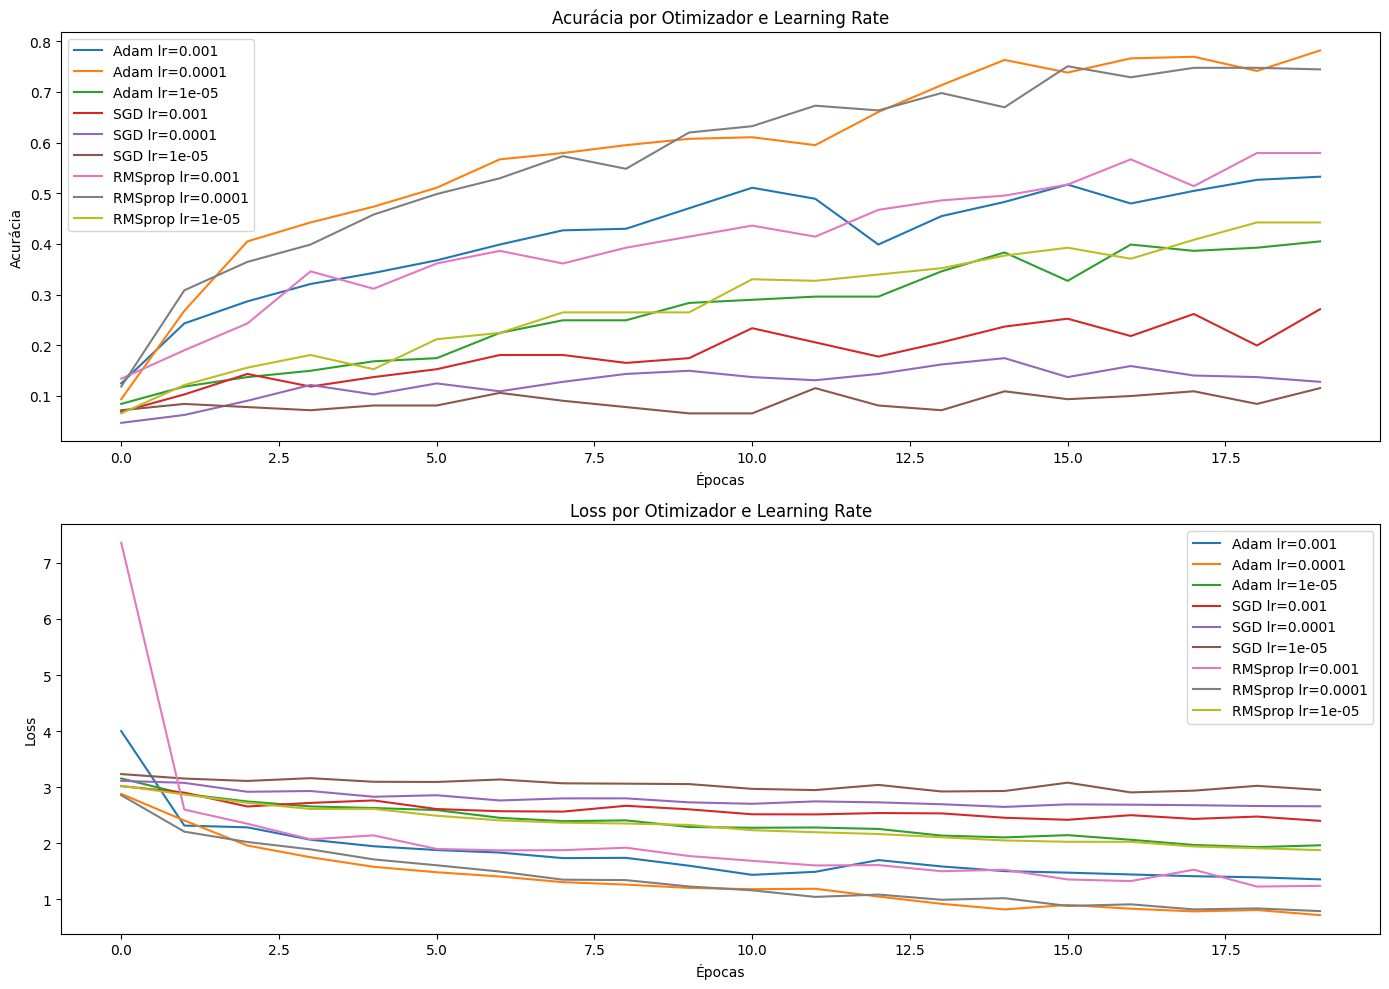

In [ ]:
# Gerador de dados com augmentação para o conjunto de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Gerador de dados para o conjunto de validação (sem augmentação, apenas normalização)
val_datagen = ImageDataGenerator(rescale=1./255)

# Gerar dados do treino a partir do diretório
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 espera imagens de tamanho 224x224
    batch_size=32,
    class_mode='categorical'
)

# Gerar dados de validação a partir do diretório
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Definir os otimizadores e taxas de aprendizado a serem testados
optimizers = {
    'Adam': Adam,
    'SGD': SGD,
    'RMSprop': RMSprop
}

learning_rates = [1e-3, 1e-4, 1e-5]

# Dicionários para armazenar resultados
results = {}

for opt_name, optimizer in optimizers.items():
    results[opt_name] = {}

    for lr in learning_rates:
        print(f'Treinando com {opt_name} e learning rate {lr}')

        # Recriar o modelo VGG16 para cada combinação de otimizador e taxa de aprendizado
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in base_model.layers:
            layer.trainable = False

        model = Sequential([
            base_model,                       # Camadas convolucionais do VGG16
            Flatten(),                        # Flatten para converter para uma dimensão
            Dense(256, activation='relu'),    # Camada densa com 256 neurônios
            Dropout(0.5),                     # Dropout para evitar overfitting
            Dense(len(train_generator.class_indices), activation='softmax')  # Saída com número de classes
        ])

        # Compilar o modelo com o otimizador e learning rate especificado
        model.compile(optimizer=optimizer(learning_rate=lr),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Treinar o modelo
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=20,                        # Ajuste conforme necessário
            verbose=0  # Silenciar a saída para simplificar o output
        )

        # Armazenar os resultados do histórico
        results[opt_name][lr] = history.history

        # Avaliar no conjunto de validação para obter a acurácia final
        val_loss, val_acc = model.evaluate(validation_generator, verbose=0)
        print(f'Final Acurácia com {opt_name} e learning rate {lr}: {val_acc * 100:.2f}%\n')

# Plotar os resultados de Acurácia e Loss para cada otimizador e taxa de aprendizado
plt.figure(figsize=(14, 10))

# Plot de Acurácia
plt.subplot(2, 1, 1)
for opt_name, opt_results in results.items():
    for lr, history in opt_results.items():
        plt.plot(history['accuracy'], label=f'{opt_name} lr={lr}')
plt.title('Acurácia por Otimizador e Learning Rate')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot de Loss
plt.subplot(2, 1, 2)
for opt_name, opt_results in results.items():
    for lr, history in opt_results.items():
        plt.plot(history['loss'], label=f'{opt_name} lr={lr}')
plt.title('Loss por Otimizador e Learning Rate')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### **Testes entre os melhores otimizadores**

Found 321 images belonging to 15 classes.
Found 48 images belonging to 15 classes.
Treinando com Adam e learning rate 0.0001
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 520ms/step - accuracy: 0.1149 - loss: 3.1309 - val_accuracy: 0.3958 - val_loss: 2.1902
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.2216 - loss: 2.4716 - val_accuracy: 0.4583 - val_loss: 1.9061
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.3733 - loss: 1.9974 - val_accuracy: 0.5417 - val_loss: 1.6368
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.4356 - loss: 1.7980 - val_accuracy: 0.5833 - val_loss: 1.4484
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.4736 - loss: 1.7355 - val_accuracy: 0.6250 - val_loss: 1.3356
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.5306 - loss: 1.5672 - val_accuracy: 0.7083 - val_loss: 1.2127
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.4816 - loss: 1.5674 - val_accuracy: 0

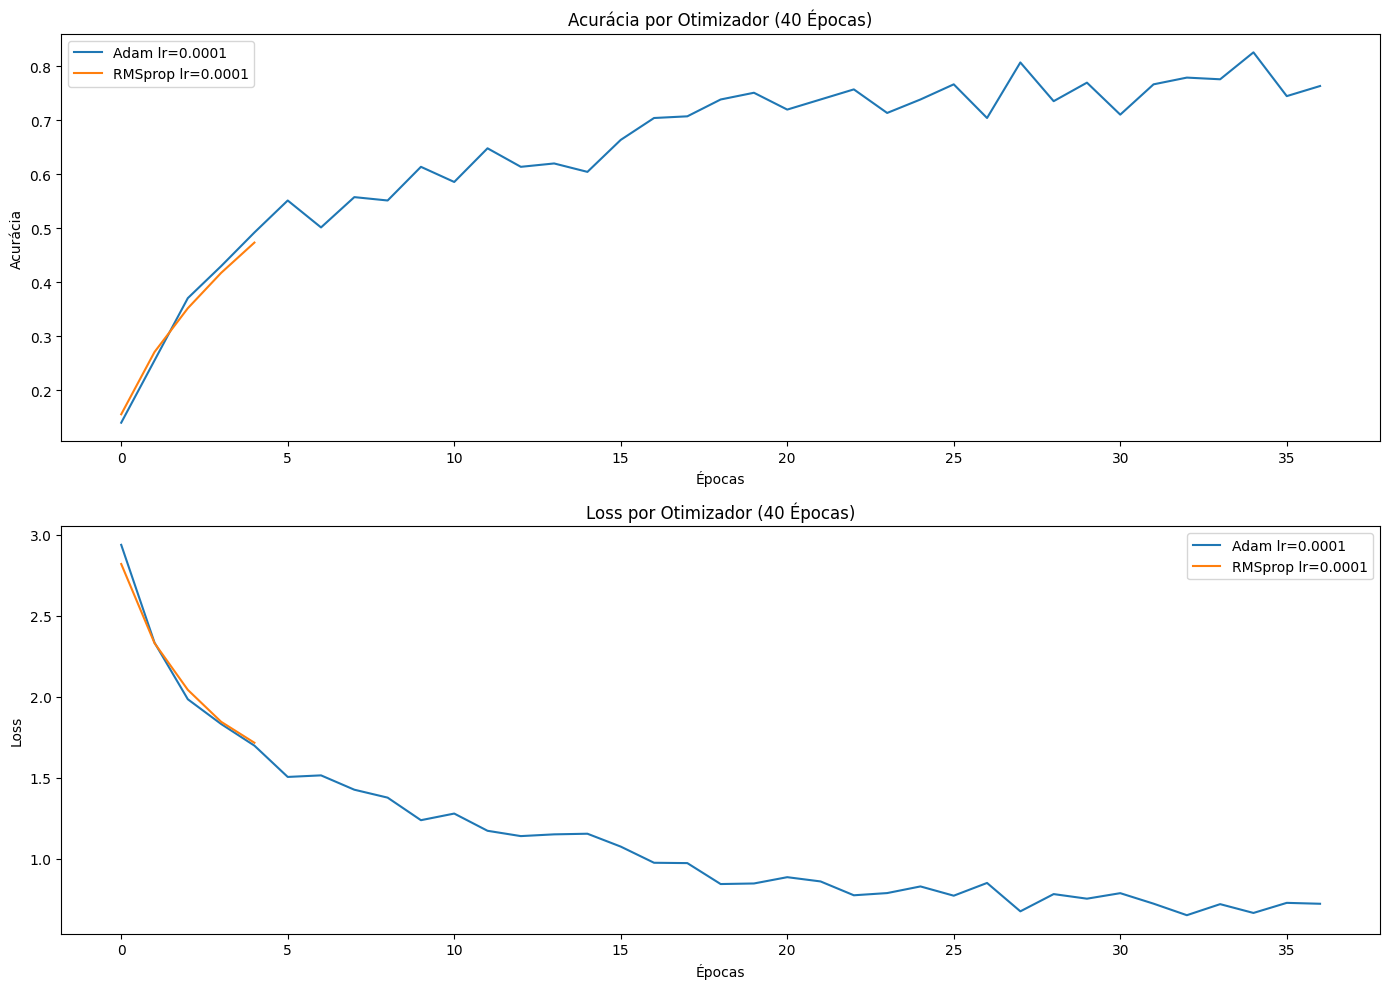

In [ ]:
# Gerador de dados com augmentação para o conjunto de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Gerador de dados para o conjunto de validação (sem augmentação, apenas normalização)
val_datagen = ImageDataGenerator(rescale=1./255)

# Gerar dados do treino a partir do diretório
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 espera imagens de tamanho 224x224
    batch_size=32,
    class_mode='categorical'
)

# Gerar dados de validação a partir do diretório
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Definir os otimizadores e taxas de aprendizado a serem testados
optimizers = {
    'Adam': Adam,
    'RMSprop': RMSprop
}

learning_rate = 0.0001

# Dicionário para armazenar resultados
results = {}

# Early stopping para parar o treinamento caso não haja melhoria no val_loss após 5 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for opt_name, optimizer in optimizers.items():
    print(f'Treinando com {opt_name} e learning rate {learning_rate}')

    # Recriar o modelo VGG16 para cada otimizador
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,                       # Camadas convolucionais do VGG16
        Flatten(),                        # Flatten para converter para uma dimensão
        Dense(256, activation='relu'),    # Camada densa com 256 neurônios
        Dropout(0.5),                     # Dropout para evitar overfitting
        Dense(len(train_generator.class_indices), activation='softmax')  # Saída com número de classes
    ])

    # Compilar o modelo com o otimizador e learning rate especificado
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Treinar o modelo com 40 épocas e early stopping
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=40,                        # Aumentar para 40 épocas
        callbacks=[early_stopping],       # Parar se não houver melhora
        verbose=1                         # Mostrar o progresso do treinamento
    )

    # Armazenar os resultados do histórico
    results[opt_name] = history.history

    # Avaliar no conjunto de validação para obter a acurácia final
    val_loss, val_acc = model.evaluate(validation_generator, verbose=0)
    print(f'Final Acurácia com {opt_name} e learning rate {learning_rate}: {val_acc * 100:.2f}%\n')

# Plotar os resultados de Acurácia e Loss para cada otimizador e learning rate
plt.figure(figsize=(14, 10))

# Plot de Acurácia
plt.subplot(2, 1, 1)
for opt_name, history in results.items():
    plt.plot(history['accuracy'], label=f'{opt_name} lr={learning_rate}')
plt.title('Acurácia por Otimizador (40 Épocas)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot de Loss
plt.subplot(2, 1, 2)
for opt_name, history in results.items():
    plt.plot(history['loss'], label=f'{opt_name} lr={learning_rate}')
plt.title('Loss por Otimizador (40 Épocas)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### **Utilizando Adam pois foi o melhor otimizador e usando fine-tuning**

Found 321 images belonging to 15 classes.
Found 48 images belonging to 15 classes.
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 522ms/step - accuracy: 0.1427 - loss: 2.8913 - val_accuracy: 0.2708 - val_loss: 2.3127
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.2188 - loss: 2.5308 - val_accuracy: 0.3125 - val_loss: 1.9567
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.2862 - loss: 2.2613 - val_accuracy: 0.4583 - val_loss: 1.7238
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.4385 - loss: 1.9736 - val_accuracy: 0.5833 - val_loss: 1.5359
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.4384 - loss: 1.7863 - val_accuracy: 0.6875 - val_loss: 1.3654
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.5390 - loss: 1.5691 - val_accuracy: 0.6458 - val_loss: 1.2700
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 307ms/step - accuracy: 0.5200 - loss: 1.4998 - val_accuracy: 0.6875 - val_loss: 1.1967
Epoch 8/40
11/11 ━━

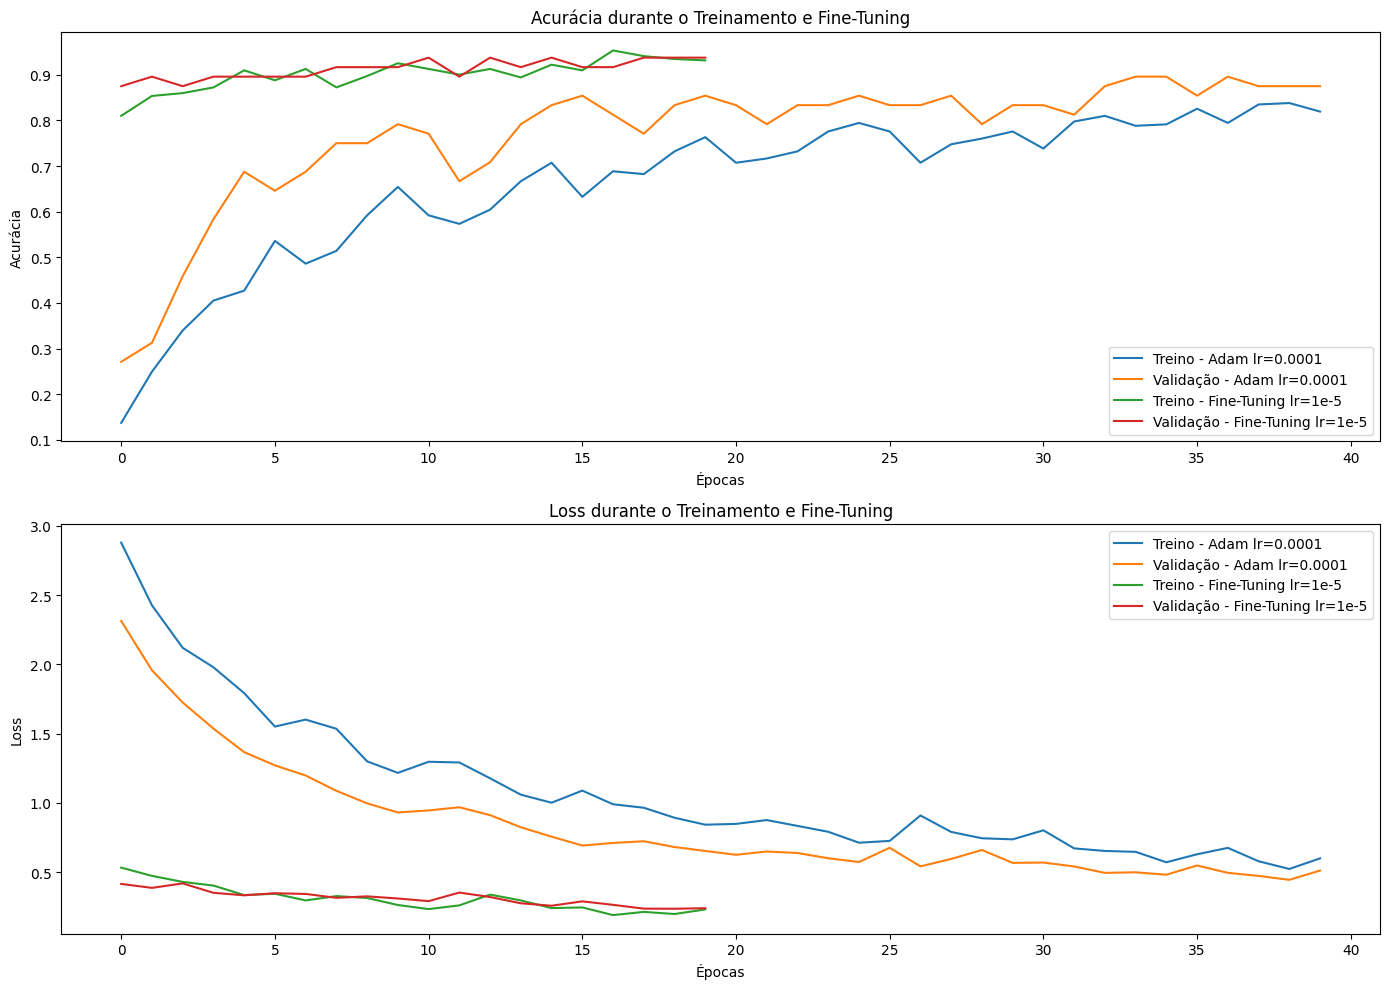

In [ ]:
# Gerador de dados com augmentação para o conjunto de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Gerador de dados para o conjunto de validação (sem augmentação, apenas normalização)
val_datagen = ImageDataGenerator(rescale=1./255)

# Gerar dados do treino a partir do diretório
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 espera imagens de tamanho 224x224
    batch_size=32,
    class_mode='categorical'
)

# Gerar dados de validação a partir do diretório
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Etapa 1: Carregar o VGG16 pré-treinado e congelar todas as camadas convolucionais
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Mantém as camadas congeladas inicialmente

# Criar o modelo inicial
model = Sequential([
    base_model,                       # Camadas convolucionais do VGG16
    Flatten(),                        # Flatten para converter para uma dimensão
    Dense(256, activation='relu'),    # Camada densa com 256 neurônios
    Dropout(0.5),                     # Dropout para evitar overfitting
    Dense(len(train_generator.class_indices), activation='softmax')  # Saída com número de classes
])

# Compilar o modelo com Adam e learning rate de 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento inicial com o modelo congelado (conforme feito antes)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,                        # Usando 40 épocas como referência inicial
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1                         # Mostrar progresso do treinamento
)

# Etapa 2: Descongelar as últimas camadas convolucionais para o Fine-Tuning
for layer in base_model.layers[-4:]:  # Descongelar apenas as últimas 4 camadas para fine-tuning
    layer.trainable = True

# Compilar o modelo novamente com Adam e uma learning rate mais baixa para o fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Taxa de aprendizado menor para evitar grandes ajustes
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento adicional com Fine-Tuning
history_fine_tuning = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,                        # Fine-tuning por mais 20 épocas
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Avaliar o modelo final após o fine-tuning
val_loss, val_acc = model.evaluate(validation_generator, verbose=0)
print(f'Acurácia final após Fine-Tuning: {val_acc * 100:.2f}%')

# Plotar os resultados de Acurácia e Loss para o treinamento original e o fine-tuning
plt.figure(figsize=(14, 10))

# Plot de Acurácia durante o treinamento e o fine-tuning
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Treino - Adam lr=0.0001')
plt.plot(history.history['val_accuracy'], label='Validação - Adam lr=0.0001')
plt.plot(history_fine_tuning.history['accuracy'], label='Treino - Fine-Tuning lr=1e-5')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validação - Fine-Tuning lr=1e-5')
plt.title('Acurácia durante o Treinamento e Fine-Tuning')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot de Loss durante o treinamento e o fine-tuning
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Treino - Adam lr=0.0001')
plt.plot(history.history['val_loss'], label='Validação - Adam lr=0.0001')
plt.plot(history_fine_tuning.history['loss'], label='Treino - Fine-Tuning lr=1e-5')
plt.plot(history_fine_tuning.history['val_loss'], label='Validação - Fine-Tuning lr=1e-5')
plt.title('Loss durante o Treinamento e Fine-Tuning')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### **ADAM com fine-tuning e data augmentation**

Found 321 images belonging to 15 classes.
Found 48 images belonging to 15 classes.
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 423ms/step - accuracy: 0.1066 - loss: 3.0863 - val_accuracy: 0.2917 - val_loss: 2.2749
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.2729 - loss: 2.4050 - val_accuracy: 0.4167 - val_loss: 1.8915
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.3899 - loss: 2.0481 - val_accuracy: 0.5625 - val_loss: 1.6062
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.4516 - loss: 1.7766 - val_accuracy: 0.7083 - val_loss: 1.3699
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.4670 - loss: 1.6865 - val_accuracy: 0.7083 - val_loss: 1.2218
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.4808 - loss: 1.5872 - val_accuracy: 0.6250 - val_loss: 1.1348
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.5910 - loss: 1.3478 - val_accuracy: 0.7500 - val_loss: 0.9731
Epoch 8/40
11/11 

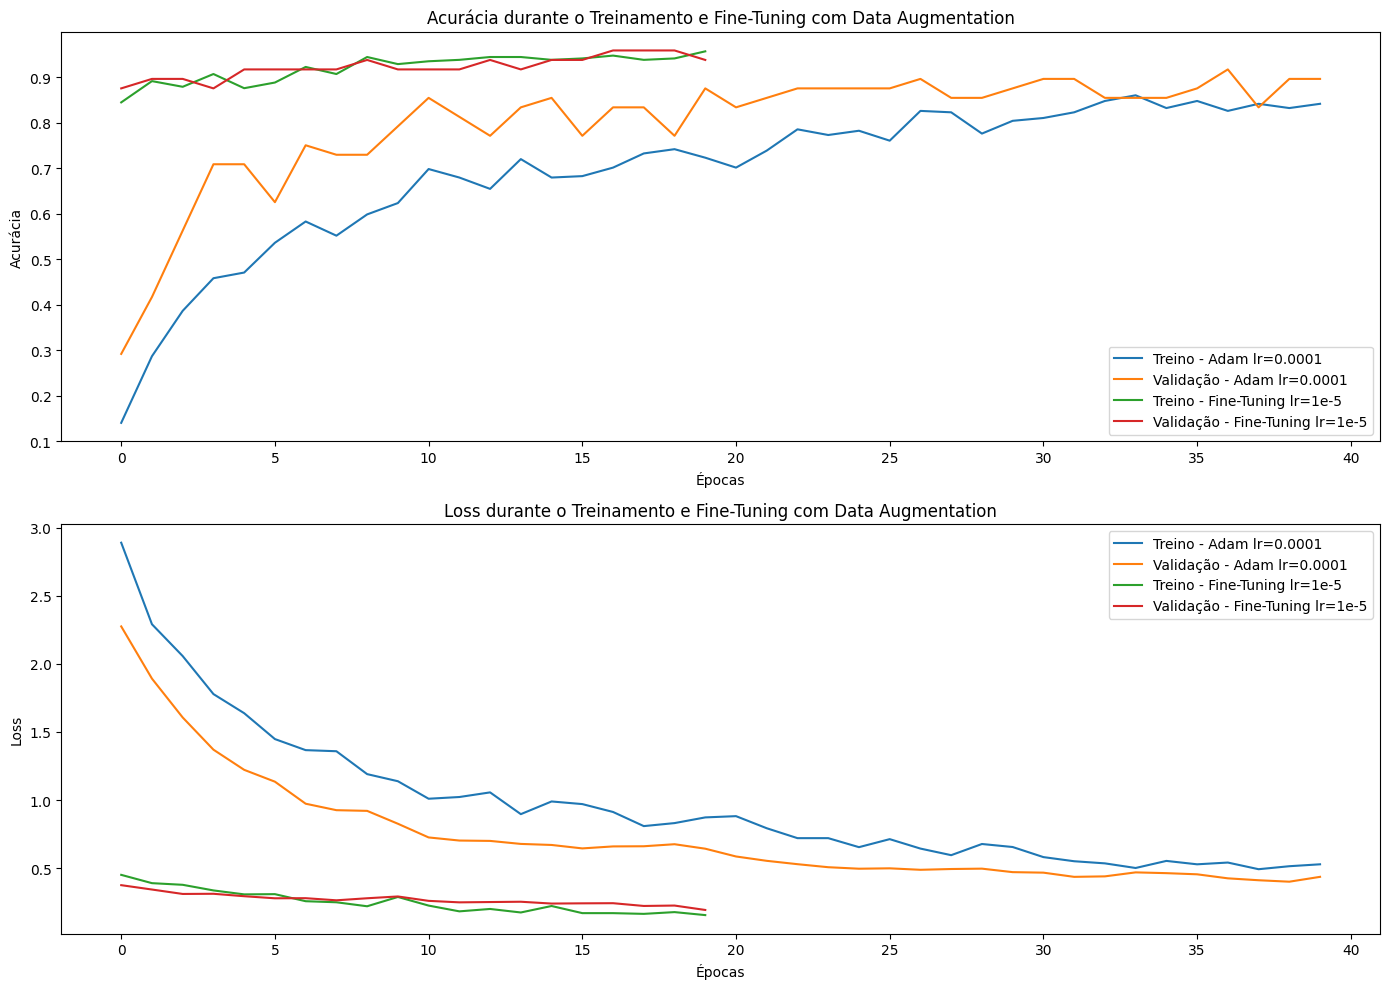

In [ ]:
# Aplicar uma augmentação de dados mais intensa para o conjunto de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,            # Rotacionar aleatoriamente as imagens até 40 graus
    width_shift_range=0.2,        # Translação horizontal
    height_shift_range=0.2,       # Translação vertical
    shear_range=0.2,              # Aplicar corte angular
    zoom_range=0.2,               # Zoom nas imagens
    horizontal_flip=True,         # Espelhamento horizontal
    fill_mode='nearest'           # Preencher áreas vazias após as transformações
)

# Gerador de dados para o conjunto de validação (apenas normalização)
val_datagen = ImageDataGenerator(rescale=1./255)

# Gerar dados do treino a partir do diretório com augmentação aplicada
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 espera imagens de tamanho 224x224
    batch_size=32,
    class_mode='categorical'
)

# Gerar dados de validação a partir do diretório sem augmentação
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Etapa 1: Carregar o VGG16 pré-treinado e congelar todas as camadas convolucionais
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Mantém as camadas congeladas inicialmente

# Criar o modelo inicial
model = Sequential([
    base_model,                       # Camadas convolucionais do VGG16
    Flatten(),                        # Flatten para converter para uma dimensão
    Dense(256, activation='relu'),    # Camada densa com 256 neurônios
    Dropout(0.5),                     # Dropout para evitar overfitting
    Dense(len(train_generator.class_indices), activation='softmax')  # Saída com número de classes
])

# Compilar o modelo com Adam e learning rate de 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento inicial com o modelo congelado e data augmentation
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,                        # Usando 40 épocas como referência inicial
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1                         # Mostrar progresso do treinamento
)

# Etapa 2: Descongelar as últimas camadas convolucionais para o Fine-Tuning
for layer in base_model.layers[-4:]:  # Descongelar apenas as últimas 4 camadas para fine-tuning
    layer.trainable = True

# Compilar o modelo novamente com Adam e uma learning rate mais baixa para o fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),  # Taxa de aprendizado menor para evitar grandes ajustes
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento adicional com Fine-Tuning e data augmentation
history_fine_tuning = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,                        # Fine-tuning por mais 20 épocas
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Avaliar o modelo final após o fine-tuning com augmentação
val_loss, val_acc = model.evaluate(validation_generator, verbose=0)
print(f'Acurácia final após Fine-Tuning com Data Augmentation: {val_acc * 100:.2f}%')

# Plotar os resultados de Acurácia e Loss para o treinamento original e o fine-tuning
plt.figure(figsize=(14, 10))

# Plot de Acurácia durante o treinamento e o fine-tuning com data augmentation
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Treino - Adam lr=0.0001')
plt.plot(history.history['val_accuracy'], label='Validação - Adam lr=0.0001')
plt.plot(history_fine_tuning.history['accuracy'], label='Treino - Fine-Tuning lr=1e-5')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validação - Fine-Tuning lr=1e-5')
plt.title('Acurácia durante o Treinamento e Fine-Tuning com Data Augmentation')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot de Loss durante o treinamento e o fine-tuning com data augmentation
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Treino - Adam lr=0.0001')
plt.plot(history.history['val_loss'], label='Validação - Adam lr=0.0001')
plt.plot(history_fine_tuning.history['loss'], label='Treino - Fine-Tuning lr=1e-5')
plt.plot(history_fine_tuning.history['val_loss'], label='Validação - Fine-Tuning lr=1e-5')
plt.title('Loss durante o Treinamento e Fine-Tuning com Data Augmentation')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
